# CLASSIFICAÇÃO MULTICLASSE

# Importação de bibliotecas

In [62]:
# MANIPULAÇÃO DE DADOS
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# ML - MÉTRICAS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.decomposition import PCA

# ALGORÍTIMOS
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC

# VISUALIZAÇÃO
import matplotlib.pyplot as plt
import seaborn as sns

import locale
import warnings
warnings.filterwarnings("ignore")

# Funções de apoio

In [63]:
def analise_por_coluna(df: pd.DataFrame):

    analise_geral = []

    for col in df.columns:
        col_data = {
            'Coluna': col,
            'Registros': df[col].count(),
            'Nulos': df[col].isnull().sum(),
            'Perc Nulos': (df[col].isnull().sum() / df.shape[0]) * 100,
            'Registro únicos': df[col].nunique(),
            'Valor mais frequente': df[col].mode()[0] if not df[col].mode().empty else None,
            'Frequência do valor mais comum': df[col].value_counts().max() if not df[col].value_counts().empty else None,
            'Tipo dado': df[col].dtype
        }

        analise_geral.append(col_data)
    return pd.DataFrame(analise_geral)

# importando dados

In [64]:
X_train = pd.read_csv("../dados/X_train.csv")
y_train = pd.read_csv("../dados/y_train.csv")

X_train.sample(10)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
130074,1016_26,1016,26,-0.892370,0.42521,0.057456,-0.139910,-0.026478,0.048533,0.101440,-0.108300,1.61020,-12.0990
483442,3776_114,3776,114,-0.342060,0.92714,0.141980,-0.057043,-0.037764,-0.044744,0.082411,-2.568000,2.39980,-11.0830
390699,3052_43,3052,43,0.884950,0.44061,0.074097,0.131270,0.011404,0.076167,0.114500,-1.361600,-1.23400,-10.4770
454650,3551_122,3551,122,-0.270160,0.95054,0.145400,-0.048512,-0.208680,-0.002205,0.067000,3.147700,6.82800,-4.4799
62824,490_104,490,104,-0.381960,-0.91047,-0.149530,-0.052769,0.177110,-0.094092,-0.032827,0.425400,2.35300,-10.1720
102815,803_31,803,31,-0.828750,0.53959,0.075217,-0.127940,-0.024687,0.041510,-0.120660,0.099422,0.87172,-10.1270
14490,113_26,113,26,-0.499110,-0.85284,-0.135020,-0.072929,-0.099370,0.020294,0.027831,0.271150,4.98640,-7.6043
242739,1896_51,1896,51,-0.045868,-0.98763,-0.149950,-0.002283,0.047570,-0.034989,0.013565,0.060132,2.67530,-8.3624
317161,2477_105,2477,105,-0.572940,0.80578,0.117760,-0.092717,-0.067206,-0.076294,0.144060,0.919360,1.78820,-9.4268
25108,196_20,196,20,-0.874330,0.46199,0.065484,-0.133510,0.023329,0.037847,-0.036761,0.223430,1.26530,-8.6496


# EDA - Análise exploratória de dados

In [65]:
X_train.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z'],
      dtype='object')

In [66]:
visao_geral_base = analise_por_coluna(X_train)
visao_geral_base

,Coluna,Registros,Nulos,Perc Nulos,Registro únicos,Valor mais frequente,Frequência do valor mais comum,Tipo dado
0,row_id,487680,0,0.0,487680,0_0,1,object
1,series_id,487680,0,0.0,3810,0,128,int64
2,measurement_number,487680,0,0.0,128,0,3810,int64
3,orientation_X,487680,0,0.0,163952,-0.98843,91,float64
4,orientation_Y,487680,0,0.0,151162,-0.98904,619,float64
5,orientation_Z,487680,0,0.0,134570,-0.14665,168,float64
6,orientation_W,487680,0,0.0,140660,-0.14656,109,float64
7,angular_velocity_X,487680,0,0.0,162043,-0.002973,21,float64
8,angular_velocity_Y,487680,0,0.0,151146,0.1022,18,float64
9,angular_velocity_Z,487680,0,0.0,201611,-0.10038,19,float64


* Considerações iniciais
    * Sem valores nulos
    * 3810 séries distintas
    * Cada série tem exatamente 128 leituras (measurement_number)
    * Os sensores tem dezenas e milhares de valores únicos, boa variabilidade

----

* Cada linha representará uma series_id 
* Colunas são features agregadas 
* Gera uma coluna target (surface)

In [67]:
funcoes_agg = ['mean', 'std', 'min', 'max', 'median', 'skew']

sensor_cols = [col for col in X_train.columns if col not in ['row_id', 'series_id', 'measurement_number']]

df_features = X_train.groupby('series_id')[sensor_cols].agg(funcoes_agg)

df_features.columns = ['_'.join(col).strip() for col in df_features.columns.values]
df_features.reset_index(inplace=True)

df_final = df_features.merge(y_train, on='series_id')

print("Shape final:", df_final.shape)
df_final.head()

Shape final: (3810, 63)


,series_id,orientation_X_mean,orientation_X_std,orientation_X_min,orientation_X_max,orientation_X_median,orientation_X_skew,orientation_Y_mean,orientation_Y_std,orientation_Y_min,orientation_Y_max,orientation_Y_median,orientation_Y_skew,orientation_Z_mean,orientation_Z_std,orientation_Z_min,orientation_Z_max,orientation_Z_median,orientation_Z_skew,orientation_W_mean,orientation_W_std,orientation_W_min,orientation_W_max,orientation_W_median,orientation_W_skew,angular_velocity_X_mean,angular_velocity_X_std,angular_velocity_X_min,angular_velocity_X_max,angular_velocity_X_median,angular_velocity_X_skew,angular_velocity_Y_mean,angular_velocity_Y_std,angular_velocity_Y_min,angular_velocity_Y_max,angular_velocity_Y_median,angular_velocity_Y_skew,angular_velocity_Z_mean,angular_velocity_Z_std,angular_velocity_Z_min,angular_velocity_Z_max,angular_velocity_Z_median,angular_velocity_Z_skew,linear_acceleration_X_mean,linear_acceleration_X_std,linear_acceleration_X_min,linear_acceleration_X_max,linear_acceleration_X_median,linear_acceleration_X_skew,linear_acceleration_Y_mean,linear_acceleration_Y_std,linear_acceleration_Y_min,linear_acceleration_Y_max,linear_acceleration_Y_median,linear_acceleration_Y_skew,linear_acceleration_Z_mean,linear_acceleration_Z_std,linear_acceleration_Z_min,linear_acceleration_Z_max,linear_acceleration_Z_median,linear_acceleration_Z_skew,group_id,surface
0,0,-0.758666,0.000363,-0.75953,-0.75822,-0.758530,-0.659082,-0.634008,0.000471,-0.63456,-0.63306,-0.634270,0.603197,-0.105474,0.000432,-0.106140,-0.104610,-0.105500,0.193309,-0.106470,0.000389,-0.107050,-0.105590,-0.106555,0.441564,-0.002481,0.052800,-0.16041,0.107650,-0.005082,-0.342643,-0.003306,0.031544,-0.079404,0.072698,-0.004037,0.016396,0.007532,0.017127,-0.030181,0.051720,0.006842,0.126373,0.263418,0.911175,-1.8644,2.85380,0.231665,0.132684,2.984195,1.387790,0.075417,5.3864,3.40755,-0.364964,-9.320391,1.095040,-12.512,-6.2681,-9.42995,0.067391,13,fine_concrete
1,1,-0.958606,0.000151,-0.95896,-0.95837,-0.958595,-0.397289,0.241867,0.000499,0.24074,0.24270,0.241890,-0.422565,0.031650,0.000508,0.030504,0.032341,0.031688,-0.517180,-0.146876,0.000521,-0.148090,-0.145870,-0.146910,-0.169549,0.004605,0.092309,-0.25480,0.283420,0.010344,-0.136062,-0.007757,0.046523,-0.134330,0.112080,-0.006330,-0.246493,0.006206,0.067533,-0.121610,0.129150,0.003538,0.004702,0.121867,1.105945,-3.1934,5.10020,0.003571,0.759101,2.768193,1.864457,-2.149200,6.6850,2.75010,-0.183139,-9.388899,2.123065,-16.928,-2.7449,-9.41380,-0.126848,31,concrete
2,2,-0.512057,0.001377,-0.51434,-0.50944,-0.512035,0.151971,-0.846171,0.000785,-0.84779,-0.84490,-0.846210,-0.161786,-0.129371,0.000541,-0.130300,-0.128520,-0.129405,-0.034406,-0.071082,0.000278,-0.071535,-0.070378,-0.071139,0.511039,0.002646,0.060168,-0.15271,0.141920,-0.003120,0.205228,-0.009232,0.035530,-0.107810,0.091946,-0.010880,-0.077528,0.027989,0.021866,-0.015697,0.088730,0.028323,0.069123,0.149711,0.756138,-2.5930,1.85330,0.174515,-0.480996,2.886745,1.769792,-1.254000,6.2105,3.03375,-0.266815,-9.395783,1.140267,-12.499,-5.7442,-9.37440,0.085877,20,concrete
3,3,-0.939169,0.000227,-0.93968,-0.93884,-0.939170,-0.096106,0.310140,0.000453,0.30943,0.31147,0.310115,1.230981,0.038955,0.000449,0.037922,0.039799,0.038889,0.097680,-0.142319,0.001371,-0.144370,-0.139340,-0.142510,0.175628,0.000624,0.179544,-0.40152,0.519130,0.006708,-0.003575,-0.002804,0.046700,-0.168150,0.135780,0.000518,-0.320948,0.007887,0.032265,-0.073414,0.085345,0.005856,-0.272105,0.201791,1.472019,-3.7934,4.20320,0.317205,-0.210587,2.657922,4.201410,-5.825100,11.7430,3.00885,-0.117380,-9.451164,3.478530,-19.845,-0.5591,-9.16170,-0.210103,31,concrete
4,4,-0.891301,0.002955,-0.89689,-0.88673,-0.890940,-0.226700,0.428144,0.006165,0.41646,0.43740,0.428865,-0.242538,0.060056,0.000985,0.058247,0.061771,0.060113,-0.092397,-0.136460,0.000541,-0.137320,-0.135380,-0.136560,0.485774,0.006969,0.044773,-0.10407,0.080904,0.010157,-0.394054,0.046109,0.016114,0.008231,0.083764,0.047561

* Balanceamento da variável alvo (surface)

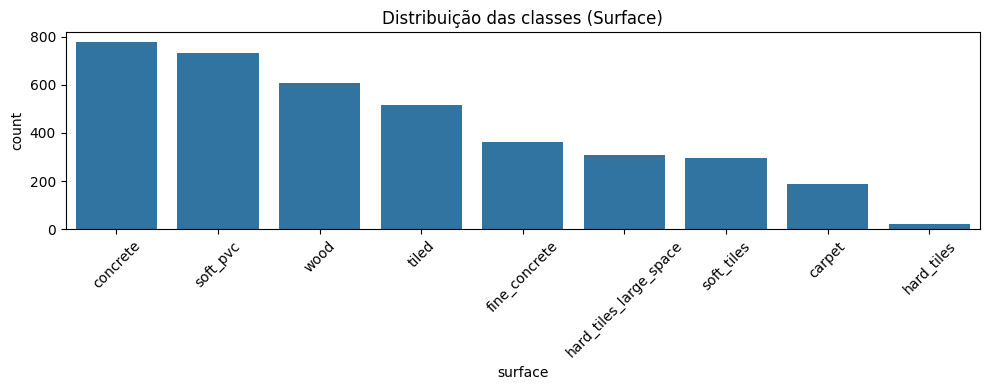

In [68]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_final, x="surface", order=df_final["surface"].value_counts().index)
plt.title("Distribuição das classes (Surface)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Correlação entre variáveis numéricas

In [69]:
corr_matrix = df_final.drop(columns=["series_id", "surface"]).corr()

# Tem muita feature, este código reforça o plot em correlações fortes positivas ou negativas
threshold = 0.85
forte_corrs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # remove diagonal e parte inferior
    .stack()
    .reset_index()
)
forte_corrs.columns = ['Feature_1', 'Feature_2', 'Correlation']
forte_corrs = forte_corrs[(forte_corrs['Correlation'].abs() > threshold)]

# Top 10 pares
forte_corrs.sort_values(by='Correlation', ascending=False).head(10)

,Feature_1,Feature_2,Correlation
348,orientation_Y_mean,orientation_Y_median,1.000000
3,orientation_X_mean,orientation_X_median,1.000000
657,orientation_Z_mean,orientation_Z_median,0.999999
930,orientation_W_mean,orientation_W_median,0.999999
655,orientation_Z_mean,orientation_Z_min,0.999891
346,orientation_Y_mean,orientation_Y_min,0.999890
656,orientation_Z_mean,orientation_Z_max,0.999890
347,orientation_Y_mean,orientation_Y_max,0.999890
453,orientation_Y_min,orientation_Y_median,0.999890
504,orientation_Y_max,orientation_Y_median,0.999889


* Considerações
    * muitas variáveis têm correlação próxima de 1 (ex: orientation_X_mean e orientation_X_median)

* Decidi utilizar PCA ( Análise de componentes principal ) pois, PCA resolve essa correlação próxima de 1 transformando em componentes não correlacionados e me traz mais certeza da qualidade dos dados.

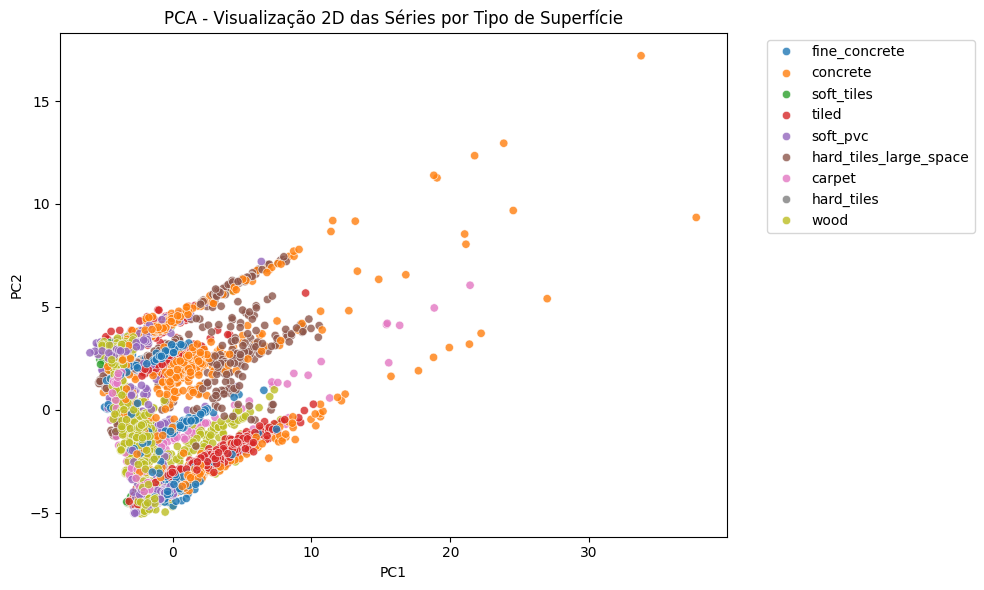

In [70]:
X = df_final.drop(columns=["series_id", "surface"])
y = df_final["surface"]

# Normalizo as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["surface"] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="surface", palette="tab10", alpha=0.8)
plt.title("PCA - Visualização 2D das Séries por Tipo de Superfície")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* ANÁLISE PCA 2D
    * As classes wood, fine_concrete e soft_tiles parecem estar mais concentradas em regiões específicas
    * concrete, hard_tiles_large_space, soft_pvc e carpet estão bastante misturadas. (Pode não ser linearmente 100% separável)
    * concrete está mais distribuído — isso pode indicar alta variabilidade intra-classe ( mais complexidade )

* Para compilar o detalhamento das séries finalizo com quantos componentes principais (PCs) são necessários para manter a maior parte da informação (variância).

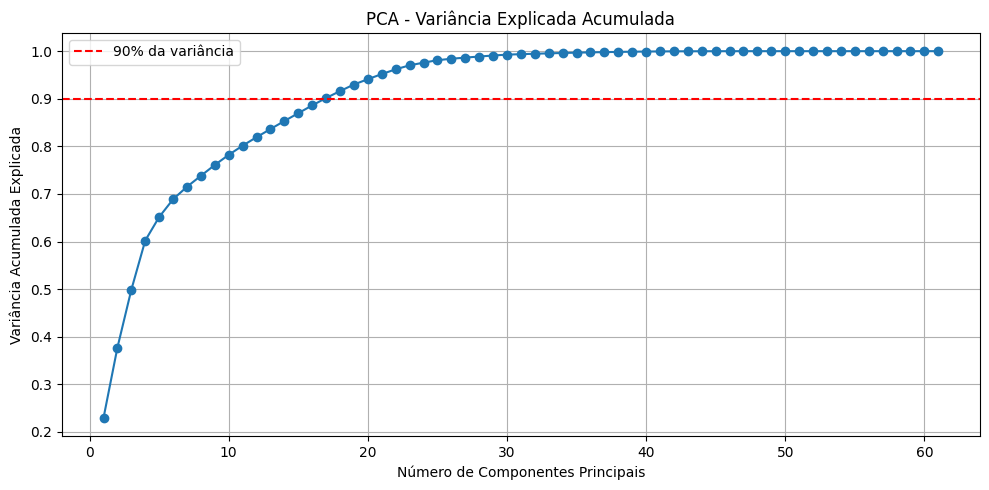

In [71]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Variância
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('PCA - Variância Explicada Acumulada')
plt.grid(True)
plt.axhline(0.90, color='red', linestyle='--', label='90% da variância')
plt.legend()
plt.tight_layout()
plt.show()

* Considerações PCA

    * Segundo o gráfico eu tenho 90% da variância explicada com cerca de 18 a 22 componentes principais.
        * Consigo manter 90% da informação com menos atributos.
        * As outras variáveis trazem pouca informação adicional.
        * Confirma a redundância que vi na correlação anterio.
    * Reduzir essa dimensionalidade reduz a chance de "overfittar" o modelo

* Análise de viés
 * A variável alvo é categórica e representa tipos de superfície física (concrete, carpet, wood, etc.)
 * não é atributo sensível ()
 * O modelo não vai tomar decisão social ou ética com impacto real (pelo menos para este caso kk)

* Conclusão:
    * Essa análise pode ser feita em uma matriz de confusão para analisar viés técnico, o fato de avaliar balanceamento junto com as métricas adotadas já é isumo suficiente para saber qual rumo tomar na modelagem.

# MODELAGEM

In [72]:
X = df_final.drop(columns=["series_id", "surface"])
y = df_final["surface"]

In [73]:
# 20% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [74]:
# Normalizar escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Biblioteca de modelos

In [75]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM Linear": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

* Resultados


 Treinando Logistic Regression...


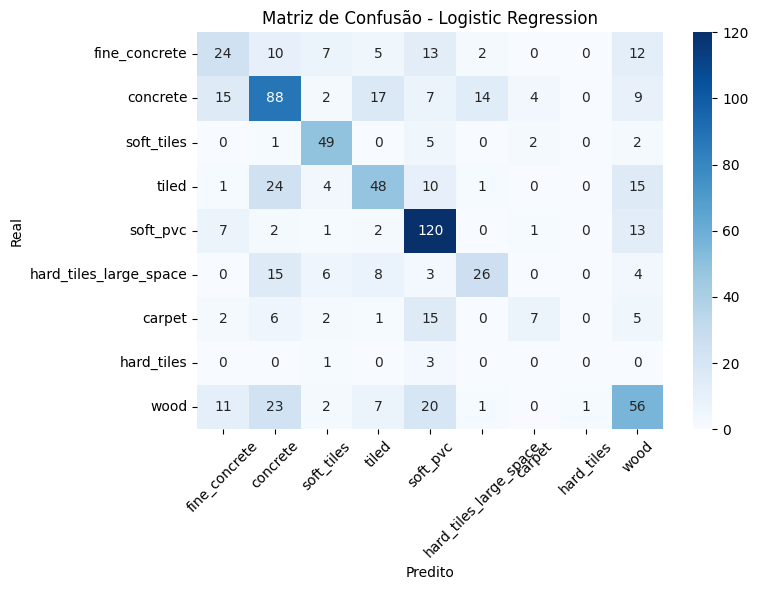


 Treinando SVM Linear...


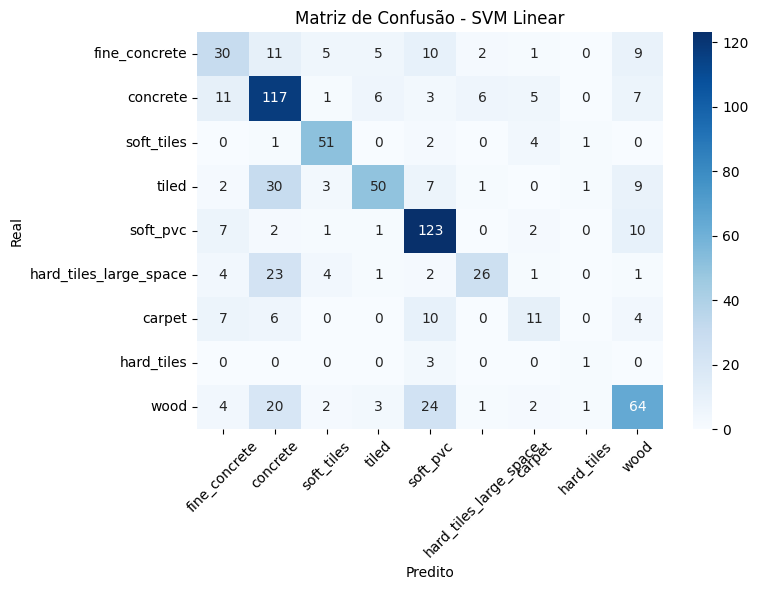


 Treinando KNN...


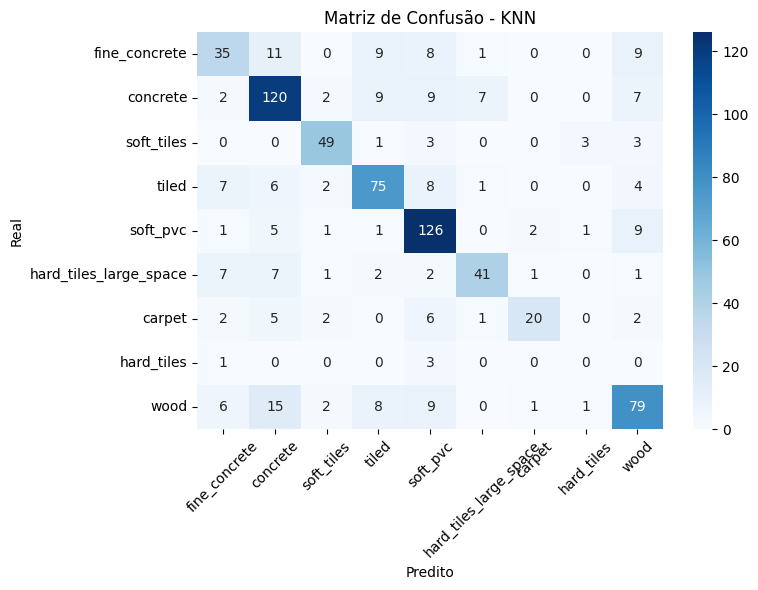


 Treinando Random Forest...


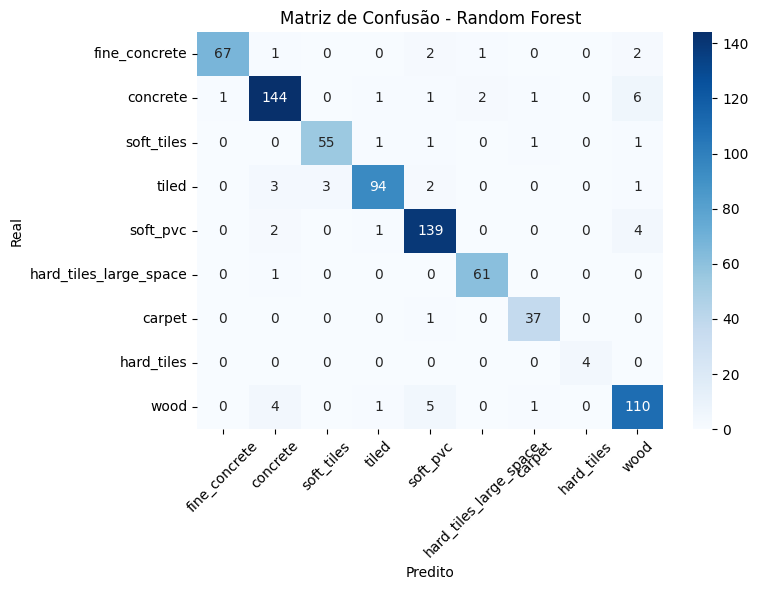

In [76]:
resultados = {}

for nome, modelo in modelos.items():
    print(f"\n Treinando {nome}...")
    if nome in ["Logistic Regression", "SVM Linear", "KNN"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    resultados[nome] = {"accuracy": acc, "f1_score": f1}
    
    # print(f" Acurácia: {acc:.4f}")
    # print(f" F1-Score (macro): {f1:.4f}")
    # print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Avaliação

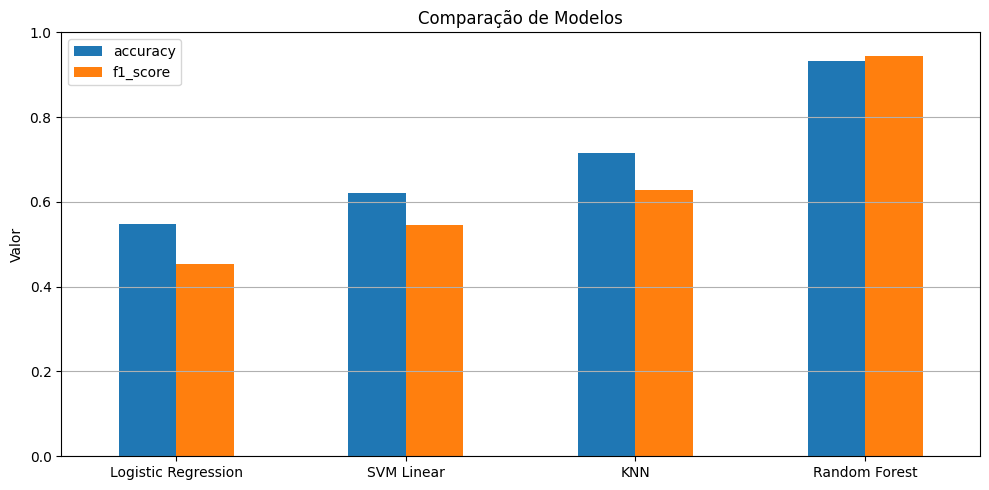

In [77]:
df_resultados = pd.DataFrame(resultados).T
df_resultados.plot(kind='bar', figsize=(10, 5), title="Comparação de Modelos", rot=0)
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* CONSIDERAÇÕES:

    * RandomForest
        * O modelo RandomForest foi o melhor modelo
        * Houve uma boa generalização e ao que indica baixo viés e baixo erro de classificação em classes minoritárias pelo fato da alta acurácia e  F1-score estarem próximos

    * KNN:
        * Resultado bom, mas pode estar sofrendo com dimensionalidade ( vale aplicar PCA )
    
    * SVM Linear:
        * Desempenho regular eu diria, mas ainda limitado por separabilidade linear.
    
    * Logistic Regression:
        * Baixo desempenho, sensível à linearidade e multicolinearidade.

### AVALIANDO O MODELO RANDOMFOREST

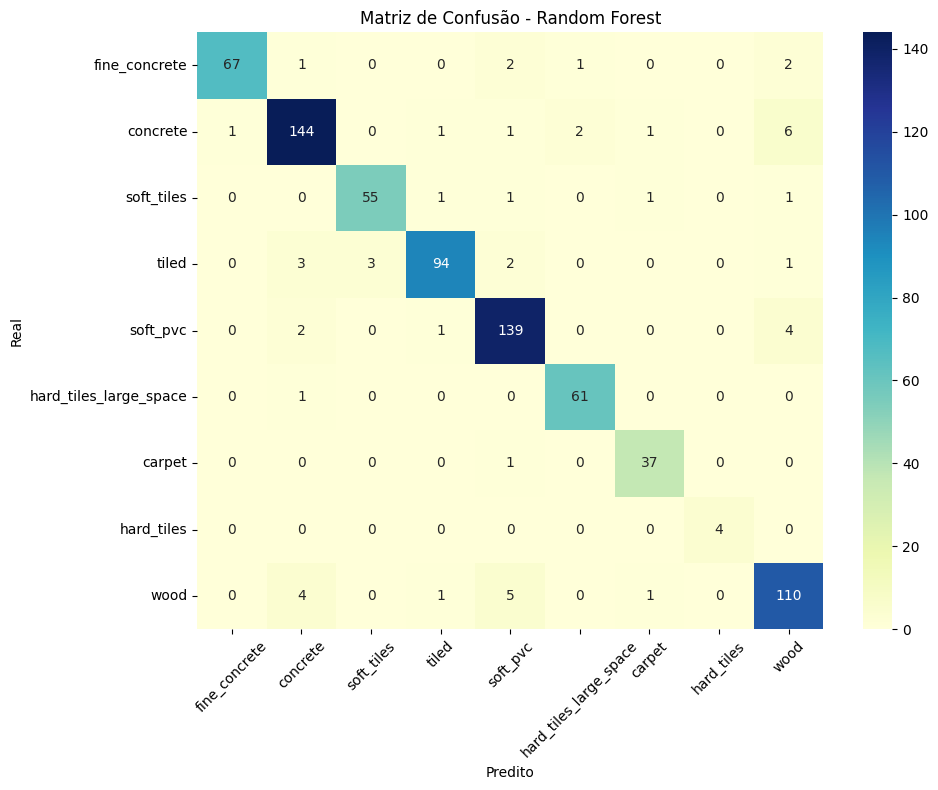

In [78]:
y_pred_rf = modelos["Random Forest"].predict(X_test)

# Matriz de confusão
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf, labels=y.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest
                        precision    recall  f1-score   support

                carpet       0.93      0.97      0.95        38
              concrete       0.93      0.92      0.93       156
         fine_concrete       0.99      0.92      0.95        73
            hard_tiles       1.00      1.00      1.00         4
hard_tiles_large_space       0.95      0.98      0.97        62
              soft_pvc       0.92      0.95      0.94       146
            soft_tiles       0.95      0.93      0.94        59
                 tiled       0.96      0.91      0.94       103
                  wood       0.89      0.91      0.90       121

              accuracy                           0.93       762
             macro avg       0.95      0.94      0.94       762
          weighted avg       0.93      0.93      0.93       762



* Importâncias das features

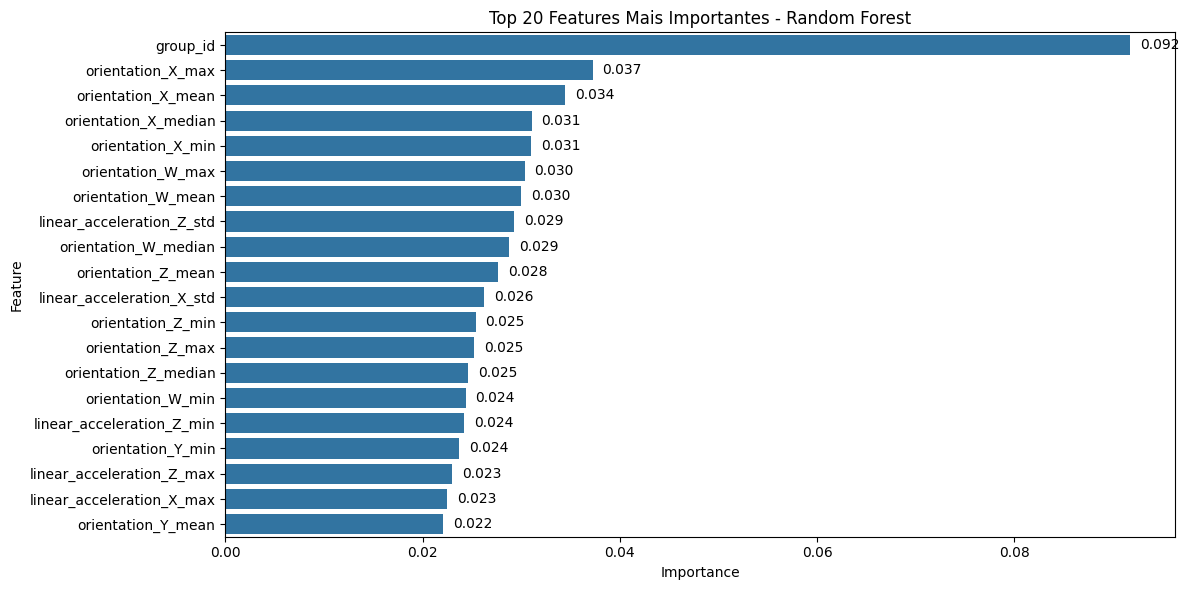

In [80]:
importances = modelos["Random Forest"].feature_importances_
feature_names = X.columns
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
df_importances = df_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Importance", y="Feature", data=df_importances.head(20))
plt.title("Top 20 Features Mais Importantes - Random Forest")

# legenda
for i, (importance, feature) in enumerate(zip(df_importances.head(20)["Importance"], df_importances.head(20)["Feature"])):
    ax.text(importance + 0.001, i, f"{importance:.3f}", va='center')

plt.tight_layout()
plt.show()

# PREVISÃO

* Carregar dados

In [81]:
X_test = pd.read_csv("../dados/X_test.csv")
X_test.sample(5)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
109470,855_30,855,30,0.82915,0.538140,0.087317,0.123660,0.025894,0.033556,-0.086889,0.14445,3.4493,-8.7509
451934,3530_94,3530,94,0.98421,0.093875,0.027088,0.147610,-0.176530,0.036418,0.043637,2.58780,3.2823,-11.4200
42772,334_20,334,20,0.75025,-0.644230,-0.092320,0.116460,0.192210,-0.144520,0.595690,-0.60010,2.8703,-8.9826
477707,3732_11,3732,11,0.98864,-0.028549,0.002962,0.147520,0.022623,-0.020708,-0.059171,-1.05280,2.3608,-10.2710
185220,1447_4,1447,4,0.55411,0.819040,0.128550,0.074873,0.005162,0.015481,-0.057390,-0.12167,2.5608,-6.3693


* Análise da base de teste
    * É importante avaliar se meus dados não são completamente diferentes dos meus dados de treino ( impossível generalizar em contextos nunca vistos pelo modelo, nem rede neural consegue ser tão absurda)

In [82]:
X_test.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z'],
      dtype='object')

In [83]:
visao_geral_base = analise_por_coluna(X_test)
visao_geral_base

,Coluna,Registros,Nulos,Perc Nulos,Registro únicos,Valor mais frequente,Frequência do valor mais comum,Tipo dado
0,row_id,488448,0,0.0,488448,0_0,1,object
1,series_id,488448,0,0.0,3816,0,128,int64
2,measurement_number,488448,0,0.0,128,0,3816,int64
3,orientation_X,488448,0,0.0,160946,0.98828,122,float64
4,orientation_Y,488448,0,0.0,149728,-0.98879,165,float64
5,orientation_Z,488448,0,0.0,121701,0.14545,103,float64
6,orientation_W,488448,0,0.0,138668,-0.13926,80,float64
7,angular_velocity_X,488448,0,0.0,159433,-0.000179,17,float64
8,angular_velocity_Y,488448,0,0.0,150410,0.006345,19,float64
9,angular_velocity_Z,488448,0,0.0,202351,-0.10113,19,float64


* Transformação nos dados

In [84]:
sensor_cols = [col for col in X_test.columns if col not in ['row_id', 'series_id', 'measurement_number']]

funcoes_agg = ['mean', 'std', 'min', 'max', 'median', 'skew']

X_test_features = X_test.groupby("series_id")[sensor_cols].agg(funcoes_agg)
X_test_features.columns = ['_'.join(col).strip() for col in X_test_features.columns]
X_test_features.reset_index(inplace=True)

X_test_features.sample(5)

,series_id,orientation_X_mean,orientation_X_std,orientation_X_min,orientation_X_max,orientation_X_median,orientation_X_skew,orientation_Y_mean,orientation_Y_std,orientation_Y_min,orientation_Y_max,orientation_Y_median,orientation_Y_skew,orientation_Z_mean,orientation_Z_std,orientation_Z_min,orientation_Z_max,orientation_Z_median,orientation_Z_skew,orientation_W_mean,orientation_W_std,orientation_W_min,orientation_W_max,orientation_W_median,orientation_W_skew,angular_velocity_X_mean,angular_velocity_X_std,angular_velocity_X_min,angular_velocity_X_max,angular_velocity_X_median,angular_velocity_X_skew,angular_velocity_Y_mean,angular_velocity_Y_std,angular_velocity_Y_min,angular_velocity_Y_max,angular_velocity_Y_median,angular_velocity_Y_skew,angular_velocity_Z_mean,angular_velocity_Z_std,angular_velocity_Z_min,angular_velocity_Z_max,angular_velocity_Z_median,angular_velocity_Z_skew,linear_acceleration_X_mean,linear_acceleration_X_std,linear_acceleration_X_min,linear_acceleration_X_max,linear_acceleration_X_median,linear_acceleration_X_skew,linear_acceleration_Y_mean,linear_acceleration_Y_std,linear_acceleration_Y_min,linear_acceleration_Y_max,linear_acceleration_Y_median,linear_acceleration_Y_skew,linear_acceleration_Z_mean,linear_acceleration_Z_std,linear_acceleration_Z_min,linear_acceleration_Z_max,linear_acceleration_Z_median,linear_acceleration_Z_skew
184,184,-0.191067,0.035454,-0.25079,-0.12850,-0.191845,0.051043,0.969549,0.006974,0.956560,0.980430,0.970050,-0.188374,0.145007,0.001286,0.142560,0.147130,0.145140,-0.076381,-0.033426,0.005281,-0.042227,-0.024285,-0.033713,0.035841,0.009821,0.024944,-0.045925,0.074135,0.009163,0.235733,0.239023,0.017470,0.192370,0.287990,0.238620,0.035782,-0.772219,0.031636,-0.855150,-0.734510,-0.759010,-1.033597,0.007619,0.478579,-1.00490,1.12870,0.009837,0.089612,2.980627,0.488335,1.877500,3.8503,3.03335,-0.250643,-9.344177,0.559884,-10.727,-8.1128,-9.29080,-0.230263
591,591,0.439416,0.006029,0.42876,0.44942,0.439555,-0.069649,0.886168,0.002972,0.881210,0.891380,0.886155,0.051012,0.134188,0.000537,0.133250,0.135030,0.134155,-0.014318,0.059720,0.000875,0.058333,0.061119,0.059718,-0.117550,-0.000054,0.020450,-0.046989,0.058089,-0.000650,0.176113,0.044478,0.011172,0.014935,0.074708,0.044235,-0.017626,-0.143221,0.014269,-0.185000,-0.118970,-0.139630,-0.749006,0.032954,0.311681,-0.82393,0.97667,0.031690,0.011894,2.665820,0.573770,1.649200,4.0684,2.55625,0.544136,-9.414284,0.415255,-10.298,-8.5012,-9.42815,0.088497
2139,2139,-0.767134,0.002633,-0.77132,-0.76209,-0.767360,0.213430,0.623740,0.003174,0.618640,0.629730,0.623440,0.198697,0.090190,0.000762,0.089106,0.091465,0.090319,-0.034994,-0.119583,0.000336,-0.120140,-0.118970,-0.119545,0.072203,0.008514,0.049895,-0.087363,0.150910,0.004970,0.494174,0.028097,0.027037,-0.039862,0.091639,0.027625,0.046258,-0.090446,0.026383,-0.158200,-0.038767,-0.087652,-0.580213,0.126702,0.989883,-2.48420,2.30550,0.118635,-0.057310,2.991544,1.189469,0.665290,5.8513,2.88240,0.226248,-9.320013,1.261765,-12.942,-5.3905,-9.41080,-0.004183
3719,3719,0.810361,0.005333,0.79993,0.81827,0.810920,-0.284836,-0.566752,0.007585,-0.581290,-0.555380,-0.565945,-0.257016,-0.080080,0.001118,-0.082523,-0.078607,-0.080068,-0.347586,0.124928,0.000665,0.123940,0.126020,0.124990,-0.080812,0.006266,0.037079,-0.065540,0.091106,0.006193,0.067118,0.058265,0.021751,0.003697,0.105420,0.058468,-0.146925,-0.192546,0.044260,-0.291050,-0.118640,-0.188825,-0.173186,0.088654,0.408090,-0.88750,0.85992,0.119855,-0.139389,2.625724,1.013832,0.660390,4.4797,2.74970,-0.090250,-9.439719,0.578998,-10.958,-8.1327,-9.39485,-0.051457
1834,1834,0.988307,0.000119,0.98806,0.98851,0.988290,-0.036048,-0.037937,0.000181,-0.038355,-0.037548,-0.037930,-0.142625,0.002538,0.000517,0.001620,0.003431,0.002490,-0.157033,0.147653,0.000805,0.146320,0.149340,0.147750,0.066860,0.015776,0.082542,-0.187260,0.284540,0.013675,0.380716,-0.003836,0.048667,-0.160830,0.148540,-0.004891,0.287189,0.000685,0.030628,-0.061047,0.062580,0.00260

* Normalizar os dados

In [88]:
# quais colunas foram usadas ao normalizar no treinamento
print(scaler.feature_names_in_)

['orientation_X_mean' 'orientation_X_std' 'orientation_X_min'
 'orientation_X_max' 'orientation_X_median' 'orientation_X_skew'
 'orientation_Y_mean' 'orientation_Y_std' 'orientation_Y_min'
 'orientation_Y_max' 'orientation_Y_median' 'orientation_Y_skew'
 'orientation_Z_mean' 'orientation_Z_std' 'orientation_Z_min'
 'orientation_Z_max' 'orientation_Z_median' 'orientation_Z_skew'
 'orientation_W_mean' 'orientation_W_std' 'orientation_W_min'
 'orientation_W_max' 'orientation_W_median' 'orientation_W_skew'
 'angular_velocity_X_mean' 'angular_velocity_X_std'
 'angular_velocity_X_min' 'angular_velocity_X_max'
 'angular_velocity_X_median' 'angular_velocity_X_skew'
 'angular_velocity_Y_mean' 'angular_velocity_Y_std'
 'angular_velocity_Y_min' 'angular_velocity_Y_max'
 'angular_velocity_Y_median' 'angular_velocity_Y_skew'
 'angular_velocity_Z_mean' 'angular_velocity_Z_std'
 'angular_velocity_Z_min' 'angular_velocity_Z_max'
 'angular_velocity_Z_median' 'angular_velocity_Z_skew'
 'linear_accelerat

In [87]:
# Fiz isso porque no fit transform do treino eu tinha colunas que não tenho agora como group_id

X_test_input = X_test_features.drop(columns=["series_id"], errors='ignore')
X_test_input = X_test_input.reindex(columns=scaler.feature_names_in_, fill_value=0)  # garante mesma ordem e preenche se faltar
X_test_scaled = scaler.transform(X_test_input)

* PREVISÃO

In [89]:
y_pred_final = modelos["Random Forest"].predict(X_test_scaled)

In [90]:
X_test_features["surface"] = y_pred_final
X_test_features[["series_id", "surface"]].sample(5)

,series_id,surface
1896,1896,soft_pvc
2781,2781,hard_tiles_large_space
1355,1355,wood
1692,1692,soft_pvc
2653,2653,hard_tiles_large_space


* RESULTADO

In [91]:
submission = X_test_features[["series_id", "surface"]].copy()

submission = submission.sort_values(by="series_id").reset_index(drop=True)
submission.sample(5)

,series_id,surface
605,605,soft_pvc
2270,2270,fine_concrete
1138,1138,hard_tiles_large_space
1603,1603,soft_pvc
819,819,soft_pvc


In [92]:
submission.to_csv("../previsao/submission.csv", index=False)
print("Arquivo salvo em: previsao")

Arquivo salvo em: previsao


# VALIDAÇÃO DE RESULTADOS

In [93]:
sample_submission = pd.read_csv("../dados/sample_submission.csv")

ids_iguais = submission["series_id"].equals(sample_submission["series_id"])
print(f"Os series_id estão na mesma ordem? {ids_iguais}")

# Verificar diferenças de valores (se tiver surface no sample)
if "surface" in sample_submission.columns:
    diffs = (submission["surface"] != sample_submission["surface"]).sum()
    print(f"Diferenças nas previsões em relação ao sample: {diffs}")
else:
    print("ℹ️ O arquivo de sample_submission não contém rótulos de surface (como esperado). Tudo certo!")

Os series_id estão na mesma ordem? True
Diferenças nas previsões em relação ao sample: 3783
